# Deriving the PDF of Orion A

In [ ]:
%matplotlib inline

Import packages

In [ ]:
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl

In [11]:
mpl.rc("xtick", direction='in')
mpl.rc("ytick", direction='in')
%matplotlib inline
#define input and output file name, and import N_H2 map
N_file='/Users/shjiao/documents/orion/sedlarge/sedlast/nh2.fits'
fig_file='PDF_1.png'
hdu=fits.open(N_file)

#define the region to statistic
x0=600
y0=700
x1=800
y1=1600

#define normal , double peak normal and linear function
def normal(eta,p0,sig0,eta0) :
    return p0 / np.sqrt(2*np.pi*sig0**2) *np.exp( -(eta-eta0)**2 /(2*sig0**2) )

def double_peak(eta,p0,p1,sig0,sig1,eta0,eta1) :
    return ( p0 / np.sqrt(2*np.pi*sig0**2) *np.exp(-(eta-eta0)**2 /(2*sig0**2)) + p1 / np.sqrt(2*np.pi*sig1**2) *np.exp(-(eta-eta1)**2 /(2*sig1**2)) )

def linear(eta,m,b) :
    return m*eta+b

#crop the region and wipe out nan
data=hdu[0].data[y0-1:y1,x0-1:x1]
data=data[data==data].flatten()

#statistic the data
mean=data.mean()
eta_array=np.log(data/mean) #eta = ln(N/N_mean)
print('Mean:',mean,'\n')

('Mean:', 2.4098811219914906e+22, '\n')


('p0:', 0.84919141391436614, 'p1:', 0.056946406710122612)
('sigma0:', 0.64973455635986566, 'sigma1:', 0.35538034204865576)
('eta0:', -0.45463236661556805, 'eta1:', 0.91724536921200139, '\n')
('m:', -3.1976529932372291)


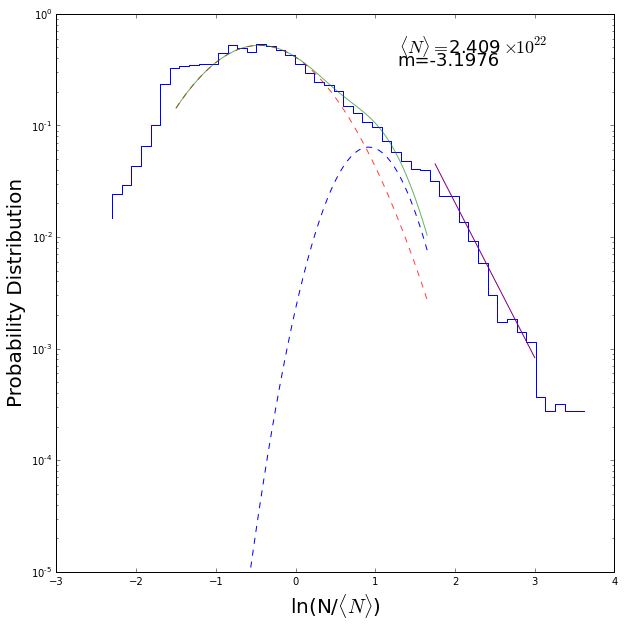

In [20]:
prob_den,bins=np.histogram(eta_array,bins=50,density=True)
bin_value=0.5*(bins[1:]+bins[:-1])

#plot the PDF
plt.figure(figsize=(10,10))
plt.plot(bin_value,prob_den,linestyle='steps-',color='blue')
plt.ylabel('Probability Distribution',size=20)
plt.xlabel(r'ln(N/$\langle N \rangle$)',size=20)
plt.yscale('log')
plt.ylim(0.00001,1)
text_mean=str(mean)
text_mean=r'$\langle N \rangle=$'+text_mean[:5]+r'$\times 10^{22}$'
plt.text(1.3,0.45,text_mean,size=18)

#define the range to fit
fit_lower=-1.
fit_upper=1.2
xdata=[bin_value[i] for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]
ydata=[prob_den[i] for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]

#fit the double peak curve
popt,pcov=curve_fit(double_peak,xdata,ydata,p0=[0.4,0.5,1,1,-1,-0.1])
print('p0:',popt[0],'p1:',popt[1])
print('sigma0:',popt[2],'sigma1:',popt[3])
print('eta0:',popt[4],'eta1:',popt[5],'\n')
#plot the curve
x=np.arange(fit_lower-0.5,fit_upper+0.5,0.05)
plt.plot(x,normal(x,popt[0],popt[2],popt[4]),'--',color='red',alpha=0.75)
plt.plot(x,normal(x,popt[1],popt[3],popt[5]),'--',color='blue',alpha=1)
plt.plot(x,double_peak(x,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5]),'-',color='green',alpha=0.6)

#fit the power tail
fit_lower=1.8
fit_upper=3
xdata=[bin_value[i] for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]
ydata=[np.log(prob_den[i]) for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]
popt,pcov=curve_fit(linear,xdata,ydata,p0=[-1,1])
print('m:',popt[0])

#plot the power tail
x=np.arange(fit_lower-0.05,fit_upper+0.05,0.05)
y=np.exp(linear(x,popt[0],popt[1]))
plt.plot(x,y,'-',color='purple')
text_m=str(popt[0])[:7]
text_m='m='+text_m
plt.text(1.3,0.35,text_m,size=18)

('p:', 0.97617347291940426)
('sigma:', 0.77804248049707003)
('eta', -0.47280996106845885, '\n')
('m:', -2.409743189949709)


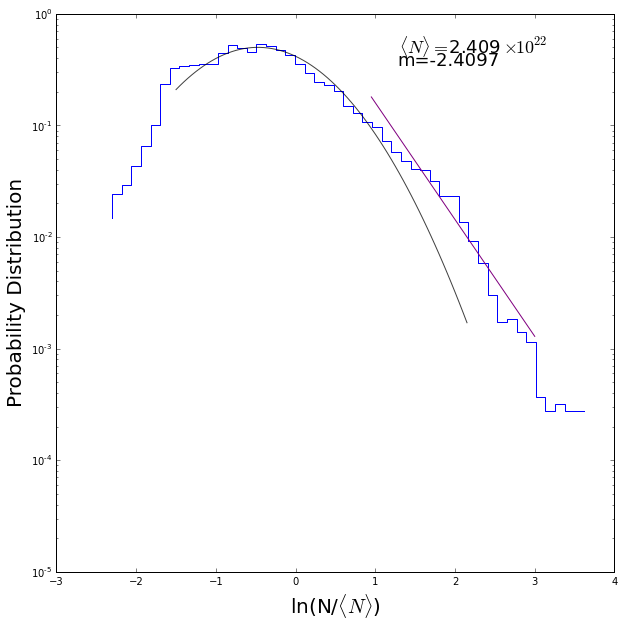

In [7]:
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

N_file='/Users/shjiao/documents/orion/sedlarge/sedlast/nh2.fits'
fig_file='PDF_1.png'
hdu=fits.open(N_file)

#define normal , double peak normal and linear function
def normal(eta,p0,sig0,eta0) :
    return p0 / np.sqrt(2*np.pi*sig0**2) *np.exp( -(eta-eta0)**2 /(2*sig0**2) )

def double_peak(eta,p0,p1,sig0,sig1,eta0,eta1) :
    return ( p0 / np.sqrt(2*np.pi*sig0**2) *np.exp(-(eta-eta0)**2 /(2*sig0**2)) + p1 / np.sqrt(2*np.pi*sig1**2) *np.exp(-(eta-eta1)**2 /(2*sig1**2)) )

def linear(eta,m,b) :
    return m*eta+b

#define the region to statistic
#this is for region 1
x0=600
y0=700
x1=800
y1=1600

#crop the region and wipe out nan
data=hdu[0].data[y0-1:y1,x0-1:x1]
data=data[data==data].flatten()

#statistic the data
mean=data.mean()
eta_array=np.log(data/mean) #eta = ln(N/N_mean)

prob_den,bins=np.histogram(eta_array,bins=50,density=True)
bin_value=0.5*(bins[1:]+bins[:-1])

#plot the PDF
plt.figure(figsize=(10,10))
plt.plot(bin_value,prob_den,linestyle='steps-',color='blue')
plt.ylabel('Probability Distribution',size=20)
plt.xlabel(r'ln(N/$\langle N \rangle$)',size=20)
plt.yscale('log')
plt.ylim(0.00001,1)
text_mean=str(mean)
text_mean=r'$\langle N \rangle=$'+text_mean[:5]+r'$\times 10^{22}$'
plt.text(1.3,0.45,text_mean,size=18)

#define the range to fit
fit_lower=-1.
fit_upper=1.7
xdata=[bin_value[i] for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]
ydata=[prob_den[i] for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]

#fit the one peak
x=np.arange(fit_lower-0.5,fit_upper+0.5,0.05)
popt,pcov=curve_fit(normal,xdata,ydata,p0=[0.5,1,0])
print('p:',popt[0])
print('sigma:',popt[1])
print('eta',popt[2],'\n')

#plot the one peak curve
plt.plot(x,normal(x,popt[0],popt[1],popt[2]),color='black',alpha=0.75)

#fit the power tail
fit_lower=1.
fit_upper=3.
xdata=[bin_value[i] for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]
ydata=[np.log(prob_den[i]) for i in range(len(bin_value)) if (bin_value[i]>=fit_lower) and (bin_value[i]<=fit_upper)]
popt,pcov=curve_fit(linear,xdata,ydata,p0=[-1,1])
print('m:',popt[0])

#plot the power tail
x=np.arange(fit_lower-0.05,fit_upper+0.05,0.05)
y=np.exp(linear(x,popt[0],popt[1]))
plt.plot(x,y,'-',color='purple')
text_m=str(popt[0])[:7]
text_m='m='+text_m
plt.text(1.3,0.35,text_m,size=18)

plt.show()
